In [1]:
from sklearn.preprocessing import LabelEncoder

Data = ['Cat' , 'Dog' , 'Fish']
Label_Encoder = LabelEncoder()
Encoded_Labels = Label_Encoder.fit_transform(Data) # fit => Map , Transform => Numbers
print(Encoded_Labels)

# .inverse => Decode


[0 1 2]


In [3]:
import numpy as np
import pandas as pd

Data = pd.read_csv('/content/drive/MyDrive/Datasets/Drug.csv')
Data

,Age,Sex,BP,Cholesterol,Na,K,Drug
0,23,F,HIGH,HIGH,0.792535,0.031258,drugY
1,47,M,LOW,HIGH,0.739309,0.056468,drugC
2,47,M,LOW,HIGH,0.697269,0.068944,drugC
3,28,F,NORMAL,HIGH,0.563682,0.072289,drugX
4,61,F,LOW,HIGH,0.559294,0.030998,drugY
...,...,...,...,...,...,...,...
195,56,F,LOW,HIGH,0.848774,0.073380,drugC
196,16,M,LOW,HIGH,0.743021,0.061886,drugC
197,52,M,NORMAL,HIGH,0.549945,0.055581,drugX
198,23,M,NORMAL,NORMAL,0.784520,0.055959,drugX


In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na           200 non-null    float64
 5   K            200 non-null    float64
 6   Drug         200 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 11.1+ KB


In [5]:
Data.isnull().sum()

,0
Age,0
Sex,0
BP,0
Cholesterol,0
Na,0
K,0
Drug,0


In [6]:
Data['Drug'].unique()

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [7]:
Data['BP'].unique()

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [8]:
Data['Cholesterol'].unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [9]:
Data['Sex'].unique()

array(['F', 'M'], dtype=object)

In [17]:
# Now i wanna Encode them to start Training
from sklearn.preprocessing import LabelEncoder
Label_Encoder_Drug = LabelEncoder()
Label_Encoder_BP = LabelEncoder()
Label_Encoder_Cholesterol = LabelEncoder()
Label_Encoder_Sex = LabelEncoder()

Data['Drug'] = Label_Encoder_Drug.fit_transform(Data['Drug'])
Data['BP'] = Label_Encoder_BP.fit_transform(Data['BP'])
Data['Cholesterol'] = Label_Encoder_Cholesterol.fit_transform(Data['Cholesterol'])
Data['Sex'] = Label_Encoder_Sex.fit_transform(Data['Sex'])
Data['Sex']

,Sex
0,0
1,1
2,1
3,0
4,0
...,...
195,0
196,1
197,1
198,1


In [19]:
feature = Data[['Age' , 'Sex' , 'BP' , 'Cholesterol' ,'Na' , 'K']]
label = Data['Drug']
feature

,Age,Sex,BP,Cholesterol,Na,K
0,23,0,0,0,0.792535,0.031258
1,47,1,1,0,0.739309,0.056468
2,47,1,1,0,0.697269,0.068944
3,28,0,2,0,0.563682,0.072289
4,61,0,1,0,0.559294,0.030998
...,...,...,...,...,...,...
195,56,0,1,0,0.848774,0.073380
196,16,1,1,0,0.743021,0.061886
197,52,1,2,0,0.549945,0.055581
198,23,1,2,1,0.784520,0.055959


In [35]:
from sklearn.model_selection import train_test_split
x_train , x_test ,   y_train , y_Test =   train_test_split(feature , label , test_size = 0.2 , random_state=42)


In [59]:
from sklearn.tree import DecisionTreeClassifier
DrugModel = DecisionTreeClassifier(criterion='entropy' , max_depth=4)
DrugModel.fit(x_train , y_train)
print(f"Accuracy for model training = {DrugModel.score(x_train , y_train)}")
print(f"Accuracy for model Testing = {DrugModel.score(x_test , y_Test)}")

Accuracy for model training = 0.9625
Accuracy for model training = 0.9


In [60]:
from sklearn.metrics import accuracy_score
y_Prediction = DrugModel.predict(x_test)
print(f"{accuracy_score(y_Test , y_Prediction)}")


0.9


In [61]:
print(classification_report(y_Test, y_Prediction))
print(confusion_matrix(y_Test, y_Prediction))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       1.00      1.00      1.00         3
           2       1.00      0.60      0.75         5
           3       0.91      0.91      0.91        11
           4       0.83      1.00      0.91        15

    accuracy                           0.90        40
   macro avg       0.95      0.87      0.90        40
weighted avg       0.91      0.90      0.90        40

[[ 5  0  0  0  1]
 [ 0  3  0  0  0]
 [ 0  0  3  1  1]
 [ 0  0  0 10  1]
 [ 0  0  0  0 15]]


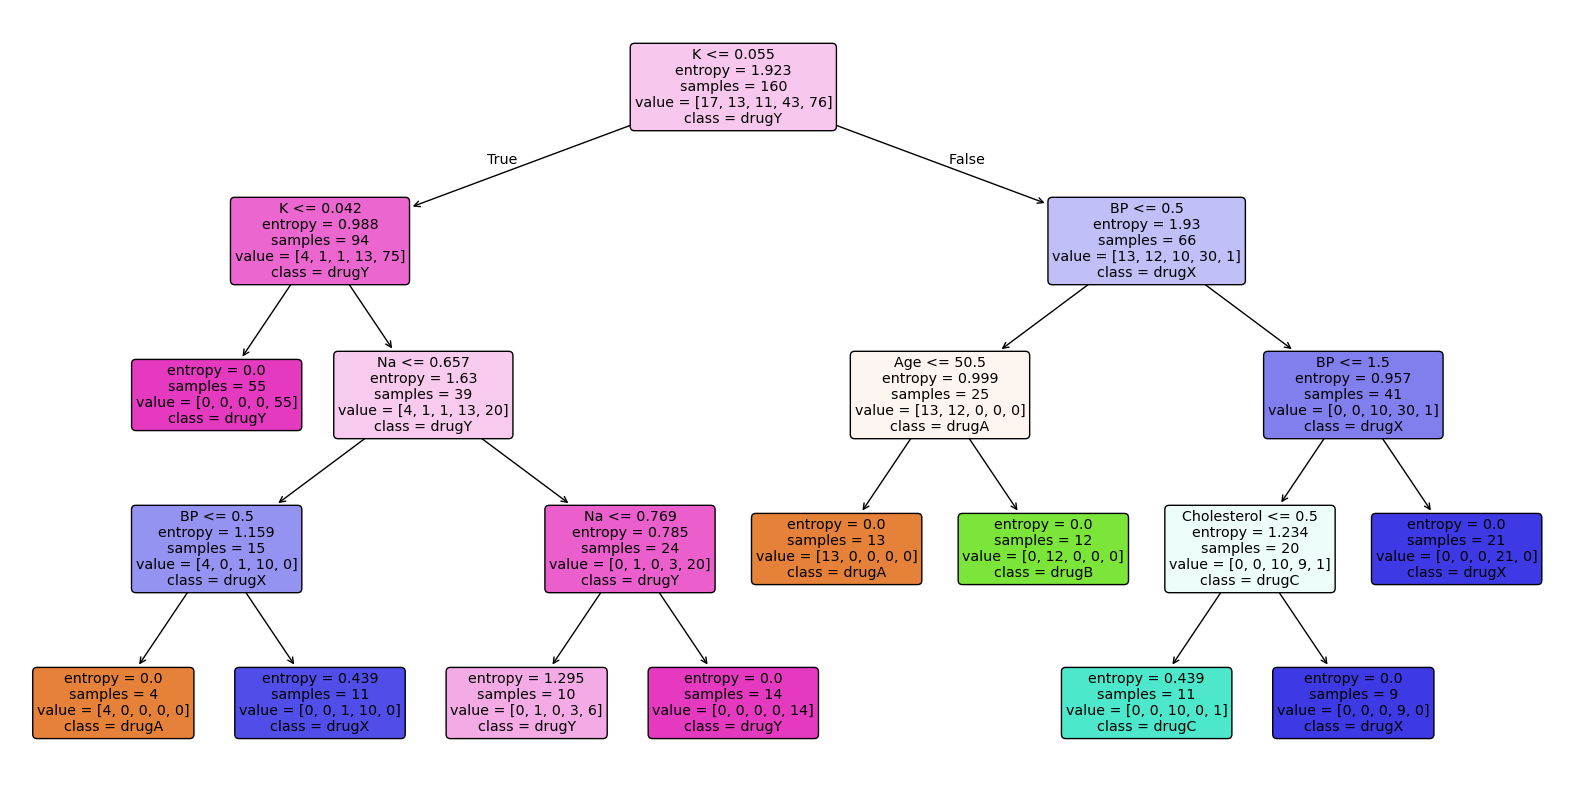

In [43]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(DrugModel,
          feature_names=['Age', 'Sex', 'BP', 'Cholesterol', 'Na', 'K'],
          class_names=Label_Encoder_Drug.classes_,
          filled=True,
          rounded=True)
plt.show()


In [45]:



from sklearn.model_selection import GridSearchCV
ParameterForGridSearch = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10]
}


GridUse = GridSearchCV(DrugModel , param_grid=ParameterForGridSearch, cv = 5)
GridUse.fit(x_train , y_train)
print(GridUse.best_params_)
print(GridUse.best_score_)

{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 5}
0.89375


In [62]:
bestmodel = GridUse.best_estimator_  # Secind Model
print(bestmodel.score(x_train , y_train))
print(bestmodel.score(x_test,y_Test))


0.99375
0.9


In [56]:
from sklearn.metrics import classification_report, confusion_matrix


predictionY = bestmodel.predict(x_test)
print(classification_report(y_Test, predictionY))
print(confusion_matrix(y_Test, predictionY))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       1.00      1.00      1.00         3
           2       1.00      0.60      0.75         5
           3       0.91      0.91      0.91        11
           4       0.83      1.00      0.91        15

    accuracy                           0.90        40
   macro avg       0.95      0.87      0.90        40
weighted avg       0.91      0.90      0.90        40

[[ 5  0  0  0  1]
 [ 0  3  0  0  0]
 [ 0  0  3  1  1]
 [ 0  0  0 10  1]
 [ 0  0  0  0 15]]
